In [1]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing

In [2]:
df = pd.read_csv('data/wine_cleared.csv')

In [3]:
df['price_round'] = df['price'].round().astype(int)
r_scaler = preprocessing.StandardScaler()
df.price = r_scaler.fit_transform(pd.DataFrame(data = df.price))
df['price'][129968]

-0.13551812448719314

In [4]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)

In [5]:
df['country'].value_counts().head(3)

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

In [6]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [7]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)

In [8]:
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [9]:
df['is_france'].sum()

22093

In [10]:
df['is_italy'].sum()

19540

In [11]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

In [12]:
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [13]:
df['old_wine'].sum()

39765

In [14]:
cp = pd.read_csv('data/country_population.csv', sep=';')

In [15]:
df = df.merge(cp, how='left')

In [16]:
regex = '\((.*?)\)'
df['locality'] = df['title'].str.findall(regex).str.get(0)

In [17]:
ca = pd.read_csv('data/country_area.csv', sep=';')

In [18]:
df = df.merge(ca, how='left')

In [19]:
# d= df[df['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

In [20]:
df['year'] = pd.to_datetime(df['year'])
df['years_diff'] = (pd.to_datetime("2022-01-12") - df['year']).dt.days

In [21]:
df['years_diff'].max()

98627.0

In [22]:
ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(df['year'])
df = pd.concat([df, year_col], axis=1)

In [23]:
encoder = ce.OneHotEncoder()
type_bin = encoder.fit_transform(df['taster_name'])
df = pd.concat([df, type_bin], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [24]:
bin_encoder = ce.BinaryEncoder()
type_bin = bin_encoder.fit_transform(df['country'])
df = pd.concat([df, type_bin], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
bin_encoder = ce.BinaryEncoder()
type_bin = bin_encoder.fit_transform(df['taster_twitter_handle'])
df = pd.concat([df, type_bin], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<AxesSubplot:>

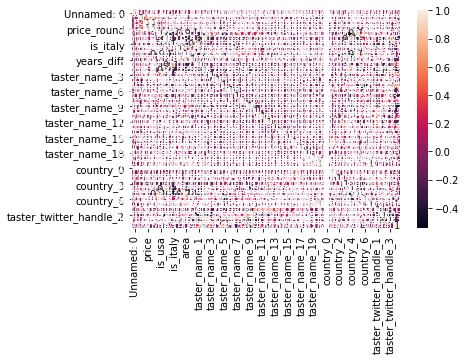

In [31]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(df.corr(), annot=True)

In [33]:
d = df[['price', 'points', 'price_round', 'taster_name_1', 'taster_name_2', 'is_france', 'is_italy']]

<AxesSubplot:>

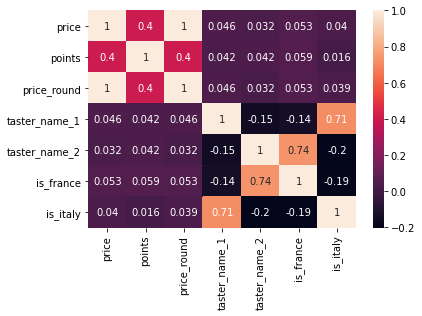

In [34]:
sns.heatmap(d.corr(), annot=True)

<AxesSubplot:>

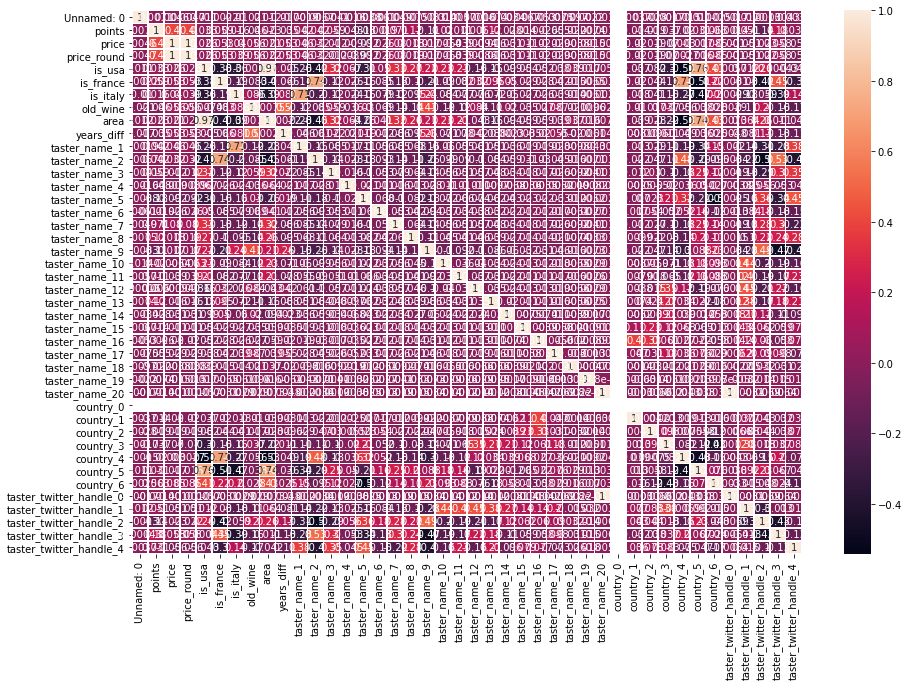

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)